<a href="https://colab.research.google.com/github/chunsubin/soong2/blob/master/%EC%86%90%EA%B8%80%EC%94%A8(0~9)%EC%9E%85%EB%A0%A5%EB%B0%9B%EC%95%84%20MINIST%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## fashion mnist

60000 10000


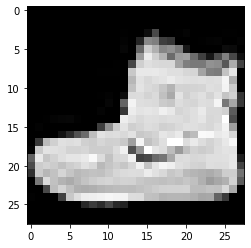

In [ ]:
# fashion mnist
# 5.19 Fashion MNIST 데이터셋 불러오기
import tensorflow as tf
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))


# 5.21 데이터 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

plt.imshow(train_X[0],cmap='gray')


In [ ]:
train_X[0].shape

(28, 28)

In [ ]:
# 5.22 Fashion MNIST 분류 모델
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 5.23 Fashion MNIST 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.5262 - accuracy: 0.8153 - val_loss: 0.4430 - val_accuracy: 0.8409
Epoch 2/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3899 - accuracy: 0.8594 - val_loss: 0.3851 - val_accuracy: 0.8609
Epoch 3/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3507 - accuracy: 0.8720 - val_loss: 0.3717 - val_accuracy: 0.8669
Epoch 4/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3261 - accuracy: 0.8815 - val_loss: 0.3575 - val_accuracy: 0.8707
Epoch 5/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3052 - accuracy: 0.8869 - val_loss: 0.3414 - val_accuracy: 0.8762
Epoch 6/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2885 - accuracy: 0.8938 - val_loss: 0.3566 - val_accuracy: 0.8739
Epoch 7/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2754 - accuracy: 0.8983 - val_loss: 0.3302 - val_accuracy:

In [ ]:
print(model.evaluate(train_X,train_Y,verbose=0))


[0.19906392693519592, 0.932449996471405]


In [ ]:
print(model.predict(train_X).round(1))

[[0.  0.  0.  ... 0.  0.  1. ]
 [1.  0.  0.  ... 0.  0.  0. ]
 [0.7 0.  0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [1.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]


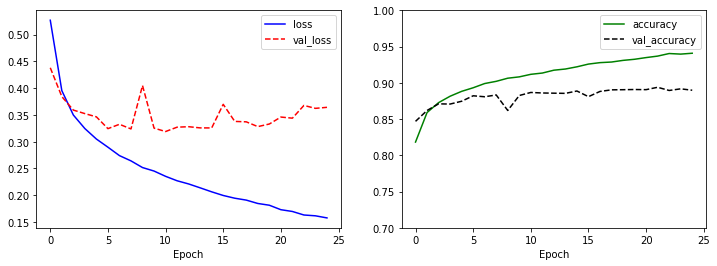

313/313 [==============================] - 1s 2ms/step - loss: 0.3963 - accuracy: 0.8820


[0.3963184952735901, 0.8820000290870667]

In [ ]:
# 5.24 Fashion MNIST 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1.0)
plt.legend()

plt.show()

# 5.25 Fashion MNIST 분류 모델 평가
model.evaluate(test_X, test_Y)

## 1 - 필기체관련


### 1 - (1)
- 예제5.19를 이용하여 필기체 MNIST(tf.keras.datasets.mnist)의 학습데이터, 테스트 데이터를 불러온 후 0~1 사이로 정규화



(28, 28)


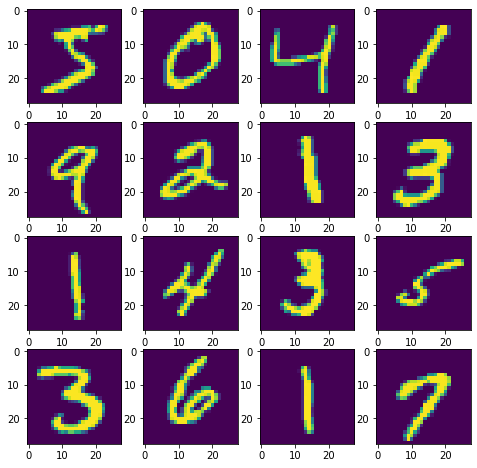

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images/255.0
test_images=test_images/255.0

print(train_images[0].shape)

# 4x4 16장 이미지 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for c in range(16):
  plt.subplot(4,4,c+1)
  plt.imshow(train_images[c].reshape(28,28))

plt.show()

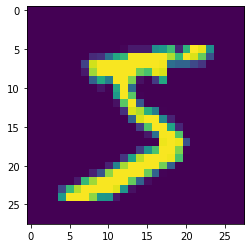

In [ ]:
plt.imshow(train_images[0])

### 1 - (2)
- 예제5.22의 신경망 모델을 사용하여 필기체 MNIST를 학습 한 후 P137와
같이 
- loss, val_loss, accuracy, val_accuracy를 plt.show()

In [ ]:
import tensorflow as tf

# MNIST 분류 모델
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 분류 모델 학습
history = model.fit(train_images, train_labels, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2990 - accuracy: 0.9164 - val_loss: 0.1680 - val_accuracy: 0.9532
Epoch 2/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1331 - accuracy: 0.9610 - val_loss: 0.1327 - val_accuracy: 0.9613
Epoch 3/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0914 - accuracy: 0.9726 - val_loss: 0.1121 - val_accuracy: 0.9669
Epoch 4/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0676 - accuracy: 0.9798 - val_loss: 0.0941 - val_accuracy: 0.9732
Epoch 5/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0518 - accuracy: 0.9846 - val_loss: 0.1006 - val_accuracy: 0.9697
Epoch 6/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0398 - accuracy: 0.9881 - val_loss: 0.0929 - val_accuracy: 0.9731
Epoch 7/25
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0308 - accuracy: 0.9905 - val_loss: 0.1040 - val_accuracy:

In [ ]:
model.predict(train_images)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
model.evaluate(train_images,train_labels,verbose=0)

[0.03441135212779045, 0.9938833117485046]

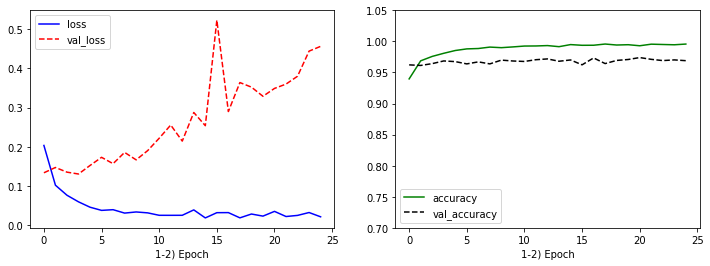

In [ ]:
# MNIST 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('1-2) Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('1-2) Epoch')
plt.ylim(0.7, 1.05)
plt.legend()

plt.show()

## 1 - (3)
- 예제5.22에서 fashion_MNIST의 loss와 accuracy와 ②번의 결과와 비교하고 차이가 나면 그 이유를 설명하시오.

In [ ]:
# 한글작성

## 1 - (4)
- 테스트 이미지 5장을 PC 그림판에서 아래와 같이 만들고 model.predict(X)
실행하여 5장의 accuracy를 출력한다. 
- --> 코드와 테스트 이미지, accuracy
를 제출한다.

In [ ]:
from PIL import Image

img_one=Image.open('/content/drive/MyDrive/Colab Notebooks/handwrite/1.png').convert("L")
img_two=Image.open('/content/drive/MyDrive/Colab Notebooks/handwrite/2.png').convert("L")
img_three=Image.open('/content/drive/MyDrive/Colab Notebooks/handwrite/3.png').convert("L")
img_nine=Image.open('/content/drive/MyDrive/Colab Notebooks/handwrite/9.png').convert("L")
img_six=Image.open('/content/drive/MyDrive/Colab Notebooks/handwrite/6.png').convert("L")


1/1 [==============================] - 0s 2ms/step - loss: 9.0837e-06 - accuracy: 1.0000


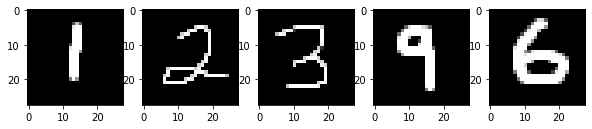

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

number_1=np.array(img_one)
number_2=np.array(img_two)
number_3=np.array(img_three)
number_4=np.array(img_nine)
number_5=np.array(img_six)

number_x=np.array([number_1,number_2,number_3,number_4,number_5])
number_x = number_x / 255.0
number_y=np.array([1,2,3,9,6])

model.evaluate(number_x,number_y)

plt.figure(figsize=(10,10))
for c in range(5):
  plt.subplot(1,5,c+1)
  plt.imshow(number_x[c].reshape(28,28),cmap="gray")

plt.show()

In [ ]:
# 1-4번 필기체 5장의 accuracy
model.predict(number_x)

array([[2.9827474e-19, 9.9997807e-01, 2.7422377e-16, 8.1136920e-14,
        2.1833852e-05, 6.6430952e-16, 3.1954804e-13, 6.8550435e-08,
        5.0160386e-13, 5.7650727e-13],
       [4.8676963e-08, 3.9179038e-12, 9.9999094e-01, 6.7229035e-11,
        1.3729011e-10, 9.9689593e-13, 3.9177808e-10, 8.8642482e-06,
        1.9789104e-07, 5.7943059e-09],
       [2.9287824e-13, 1.6643804e-07, 2.2199254e-06, 9.9998558e-01,
        3.0525513e-10, 1.3370363e-08, 9.9498719e-13, 2.6111863e-07,
        7.4641525e-07, 1.1020792e-05],
       [2.4356655e-16, 5.1814922e-13, 3.6257152e-15, 2.2611354e-10,
        3.5239235e-11, 1.5806379e-15, 1.4647143e-23, 2.0401100e-10,
        3.1902481e-08, 1.0000000e+00],
       [8.4459458e-14, 1.6130417e-17, 6.7161242e-21, 1.4423202e-22,
        1.5437223e-11, 9.9082720e-10, 1.0000000e+00, 1.9073267e-22,
        1.6614837e-12, 1.4376761e-18]], dtype=float32)

In [ ]:
model.predict(number_x).round(1)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
model.evaluate(number_x,number_y,verbose=0)

[9.083671102416702e-06, 1.0]

## MNIST을 CNN에 적용한 내용이다.

### 2 - (1)
MNIST 학습데이터를 이용하여 예제 6.7의 CNN에 적용하여 학습시키고 그 결과를 문제1>의 ②와 비교한다


In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images/255.0
test_images=test_images/255.0

# 데이터를 채널을 가진 이미지 형태(3차원)으로 바꾸기
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# 컨볼루션 신경망 정의
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten_17 (Flatten)         (None, 30976)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               3965056   
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
___________________________________________

In [ ]:
# 분류 모델 학습
history = model.fit(train_images, train_labels, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2050 - accuracy: 0.9396 - val_loss: 0.1371 - val_accuracy: 0.9579
Epoch 2/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.1037 - accuracy: 0.9688 - val_loss: 0.1364 - val_accuracy: 0.9597
Epoch 3/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0795 - accuracy: 0.9755 - val_loss: 0.1270 - val_accuracy: 0.9641
Epoch 4/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0586 - accuracy: 0.9818 - val_loss: 0.1428 - val_accuracy: 0.9644
Epoch 5/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0465 - accuracy: 0.9855 - val_loss: 0.1510 - val_accuracy: 0.9681
Epoch 6/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0455 - accuracy: 0.9858 - val_loss: 0.1548 - val_accuracy: 0.9654
Epoch 7/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0362 - accuracy: 0.9894 - val_loss: 0.1727 - val_accuracy:

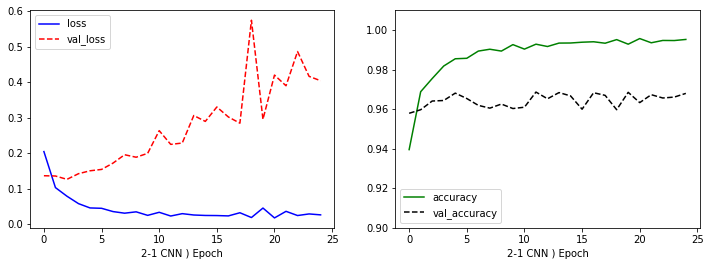

In [ ]:
# MNIST 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('2-1 CNN ) Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('2-1 CNN ) Epoch')
plt.ylim(0.9, 1.01)
plt.legend()

plt.show()

In [ ]:
model.evaluate(test_images,test_labels,verbose=0)

[0.32385993003845215, 0.9735999703407288]

### 2 - (2)
- 위 ①번에 문제1> ④번의 테스트 이미지 5장을 사용하여 accuracy를 구하여 제출

1/1 [==============================] - 0s 1ms/step - loss: 0.0148 - accuracy: 1.0000


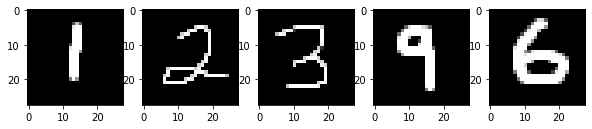

In [ ]:
number_1=np.array(img_one)
number_2=np.array(img_two)
number_3=np.array(img_three)
number_4=np.array(img_nine)
number_5=np.array(img_six)

number_x=np.array([number_1,number_2,number_3,number_4,number_5])
number_x = number_x / 255.0
number_y=np.array([1,2,3,9,6])

number_x=number_x.reshape(-1,28,28,1)

model.evaluate(number_x,number_y)

plt.figure(figsize=(10,10))
for c in range(5):
  plt.subplot(1,5,c+1)
  plt.imshow(number_x[c].reshape(28,28),cmap="gray")

plt.show()

In [ ]:
model.predict(number_x).round(1)

array([[0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0.9],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ]], dtype=float32)

In [ ]:
model.evaluate(number_x,number_y,verbose=0)

[0.01481943391263485, 1.0]

### 2 - (3)
- 위 ①번에 예제6.15 augment_size = 10000 으로 하여 학습이미지를70000장으로늘리고 
- image_generator를 적용한 학습을 시킨다. 그 결과를 ①번과 비교한다.


In [ ]:
from keras.datasets import mnist
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images/255.0
test_images=test_images/255.0

train_images=train_images.reshape(-1,28,28,1)
test_images=test_images.reshape(-1,28,28,1)

train_images.shape

(60000, 28, 28, 1)

In [ ]:
# Image Augmentation 데이터 표시
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.10,
            shear_range=0.5,
            width_shift_range=0.10,
            height_shift_range=0.10,
            horizontal_flip=True,
            vertical_flip=False)

augment_size = 10000

randidx = np.random.randint(train_images.shape[0], size=augment_size)
x_augmented = train_images[randidx].copy()
y_augmented = train_labels[randidx].copy()
x_augmented = image_generator.flow(np.tile(train_images[0].reshape(28*28),10000).reshape(-1,28,28,1), 
                                   np.zeros(augment_size),batch_size=augment_size, shuffle=False).next()[0]

# 원래 데이터인 x_train 에 Image Augmentation 된 x_augmented 를 추가합니다.
train_images = np.concatenate((train_images, x_augmented))
train_labels = np.concatenate((train_labels, y_augmented))

train_images.shape

(70000, 28, 28, 1)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten_18 (Flatten)         (None, 30976)             0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               3965056   
_________________________________________________________________
dense_37 (Dense)             (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
___________________________________________

In [ ]:
# 분류 컨볼루션 신경망 모델 학습
history = model.fit(train_images, train_labels, epochs=25, validation_split=0.25)

Epoch 1/25
1641/1641 [==============================] - 8s 5ms/step - loss: 0.1984 - accuracy: 0.9402 - val_loss: 7.1344 - val_accuracy: 0.4689
Epoch 2/25
1641/1641 [==============================] - 8s 5ms/step - loss: 0.1004 - accuracy: 0.9691 - val_loss: 7.7869 - val_accuracy: 0.4711
Epoch 3/25
1641/1641 [==============================] - 8s 5ms/step - loss: 0.0796 - accuracy: 0.9751 - val_loss: 9.2181 - val_accuracy: 0.4715
Epoch 4/25
1641/1641 [==============================] - 8s 5ms/step - loss: 0.0570 - accuracy: 0.9814 - val_loss: 9.6194 - val_accuracy: 0.4688
Epoch 5/25
1641/1641 [==============================] - 8s 5ms/step - loss: 0.0471 - accuracy: 0.9848 - val_loss: 12.0374 - val_accuracy: 0.4713
Epoch 6/25
1641/1641 [==============================] - 8s 5ms/step - loss: 0.0411 - accuracy: 0.9871 - val_loss: 16.2560 - val_accuracy: 0.4729
Epoch 7/25
1641/1641 [==============================] - 8s 5ms/step - loss: 0.0382 - accuracy: 0.9879 - val_loss: 17.0007 - val_accura

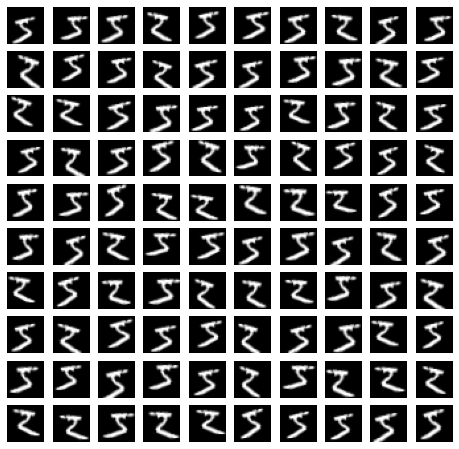

array([[0.0000000e+00, 0.0000000e+00, 3.1235238e-30, ..., 2.8244748e-30,
        8.3462297e-32, 5.5429619e-21],
       [1.1928854e-25, 0.0000000e+00, 8.3249171e-34, ..., 0.0000000e+00,
        1.7596230e-34, 4.2027383e-25],
       [1.9950735e-38, 8.4141833e-26, 8.9768703e-24, ..., 6.2418133e-32,
        3.6622809e-33, 1.9768183e-28],
       ...,
       [0.0000000e+00, 5.4094817e-28, 5.6697941e-12, ..., 1.0000000e+00,
        1.1558154e-11, 2.9301665e-35],
       [0.0000000e+00, 8.0063684e-32, 1.0000000e+00, ..., 3.6508808e-21,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.5249859e-38, 6.0443861e-29, ..., 0.0000000e+00,
        0.0000000e+00, 2.8016187e-37]], dtype=float32)

In [ ]:
# 새롭게 생성된 이미지 표시
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
for c in range(100):
    plt.subplot(10,10,c+1)
    plt.axis('off')
    plt.imshow(x_augmented[c].reshape(28,28), cmap='gray')
plt.show()

model.predict(x_augmented)

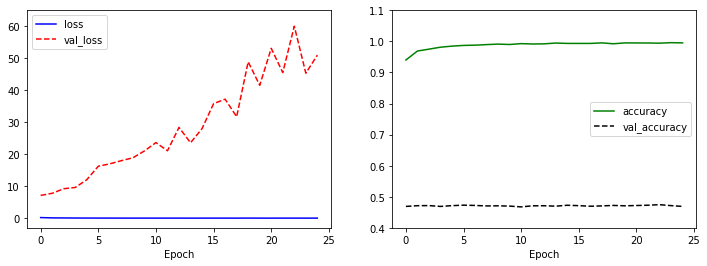

In [ ]:
# MNIST 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.ylim(-3,65)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.4, 1.1)
plt.legend()

plt.show()

In [ ]:
model.predict(train_images)

array([[3.5959698e-33, 1.9957142e-29, 5.0542202e-15, ..., 5.5165164e-33,
        8.4347421e-28, 5.5165032e-30],
       [1.0000000e+00, 0.0000000e+00, 2.6942636e-34, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 6.1590085e-32,
        2.4554444e-30, 3.9776857e-28],
       ...,
       [0.0000000e+00, 5.4094817e-28, 5.6697941e-12, ..., 1.0000000e+00,
        1.1558154e-11, 2.9301665e-35],
       [0.0000000e+00, 8.0063684e-32, 1.0000000e+00, ..., 3.6508808e-21,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.5249859e-38, 6.0443861e-29, ..., 0.0000000e+00,
        0.0000000e+00, 2.8016187e-37]], dtype=float32)

In [ ]:
model.evaluate(train_images, train_labels,verbose=0)

[12.788159370422363, 0.8616428375244141]

### 2 - (4)
- 위 ③번에 문제1> ④번의 테스트 이미지 5장을 사용하여 accuracy를 구하여 제출

1/1 [==============================] - 0s 2ms/step - loss: 4.9352e-06 - accuracy: 1.0000


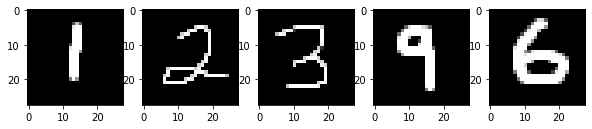

In [ ]:
number_1=np.array(img_one)
number_2=np.array(img_two)
number_3=np.array(img_three)
number_4=np.array(img_nine)
number_5=np.array(img_six)

number_x=np.array([number_1,number_2,number_3,number_4,number_5])
number_x = number_x / 255.0
number_y=np.array([1,2,3,9,6])

number_x=number_x.reshape(-1,28,28,1)

model.evaluate(number_x,number_y)

plt.figure(figsize=(10,10))
for c in range(5):
  plt.subplot(1,5,c+1)
  plt.imshow(number_x[c].reshape(28,28),cmap="gray")

plt.show()

In [ ]:
model.predict(number_x).round(1)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
model.evaluate(number_x,number_y,verbose=0)

[4.935203833156265e-06, 1.0]